In [1]:
from fastai.vision.all import *
import gradio as gr

/home/matt/miniconda3/envs/gradio_env/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: /home/matt/miniconda3/envs/gradio_env/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN3c106detail19maybe_wrap_dim_slowEllb
  warn(f"Failed to load image Python extension: {e}")


In [2]:
def is_cat(x):
    return x[0].isupper()

In [4]:
import os
from urllib.request import urlretrieve

In [6]:
urlretrieve("https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fstatic.pexels.com%2Fphotos%2F248307%2Fpexels-photo-248307.jpeg&f=1&nofb=1", "dog.jpg")

('dog.jpg', <http.client.HTTPMessage at 0x7fccc05c1630>)

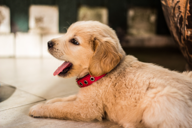

In [7]:
im = PILImage.create("dog.jpg")
im.thumbnail((192,192))
im

In [8]:
learn = load_learner("model.pkl")

In [9]:
learn.predict(im)

('False', TensorBase(0), TensorBase([9.9999e-01, 6.8932e-06]))

In [10]:
%time learn.predict(im)

CPU times: user 326 ms, sys: 2.75 ms, total: 329 ms
Wall time: 37.2 ms


('False', TensorBase(0), TensorBase([9.9999e-01, 6.8932e-06]))

High probability that it's a dog (99.999%) and not a cat (6.893e-06 %).

In [13]:
def classify_image(img, categories = ("Dog", "Cat")):
    pred, idx, probs = learn.predict(img)
    return dict(zip(categories, map(float, probs)))

In [14]:
classify_image(im)

{'Dog': 0.999993085861206, 'Cat': 6.893150384712499e-06}

In [6]:
urlretrieve("https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fstatic.pexels.com%2Fphotos%2F248307%2Fpexels-photo-248307.jpeg&f=1&nofb=1", "dog.jpg")

('dog.jpg', <http.client.HTTPMessage at 0x7fccc05c1630>)

In [15]:
from fastcore.all import *

def search_images(term, max_images=200):
    url = 'https://duckduckgo.com/'
    res = urlread(url, data={'q':term})
    searchObj = re.search(r'vqd=([\d-]+)\&', res)
    requestUrl = url + 'i.js'
    params = dict(l='us-en', o='json', q=term, vqd=searchObj.group(1), f=',,,', p='1', v7exp='a')
    urls,data = set(),{'next':1}
    while len(urls)<max_images and 'next' in data:
        data = urljson(requestUrl,data=params)
        urls.update(L(data['results']).itemgot('image'))
        requestUrl = url + data['next']
        time.sleep(0.2)
    return L(urls)[:max_images]

In [16]:
urls = search_images('cat photos', max_images=1)

In [ ]:
urls = search_images('bird photos', max_images=1)